### compare results at different gamma values

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
from sklearn.neighbors import KernelDensity
from scipy.stats import linregress

%matplotlib inline

/Users/jpw/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# use gamma=1 data frame as the base
colnames = ['Source', 't_star', 't_drift_min', 't_drift_max', 'M_min', 'M_max']
df = pd.read_csv('drift_fit_results.txt', skiprows=1, header=0, sep='\s+', names=colnames)

# merge with other gamma
df05 = pd.read_csv('gamma0.5/drift_fit_results_gamma.txt', skiprows=1, header=0, sep='\s+', names=colnames)
df08 = pd.read_csv('gamma0.8/drift_fit_results_gamma.txt', skiprows=1, header=0, sep='\s+', names=colnames)
df12 = pd.read_csv('gamma1.2/drift_fit_results_gamma.txt', skiprows=1, header=0, sep='\s+', names=colnames)
df15 = pd.read_csv('gamma1.5/drift_fit_results_gamma.txt', skiprows=1, header=0, sep='\s+', names=colnames)

In [3]:
df

,Source,t_star,t_drift_min,t_drift_max,M_min,M_max
0,AS209,1.0,0.165,0.796,0.0321,0.2768
1,CIDA1,1.0,0.097,2.677,0.0021,0.0885
2,CIDA7,2.0,0.186,6.456,0.0015,0.0632
3,CITau,2.5,0.105,1.108,0.0159,0.3389
4,CXTau,1.6,0.103,5.177,0.0015,0.1115
5,CYTau,2.3,0.416,2.750,0.0189,0.1465
6,DLTau,3.2,0.734,5.948,0.0390,0.3712
7,DMTau,3.2,0.176,5.316,0.0102,0.2775
8,DNTau,0.9,0.169,1.710,0.0129,0.2445
9,DoAr25,2.0,0.057,0.183,0.0357,0.2567


In [4]:
df_merge = df.merge(df05[['Source', 't_drift_max', 'M_max']], on='Source', suffixes=('10','05'))
df_merge = df_merge.merge(df08[['Source', 't_drift_max', 'M_max']], on='Source')#, suffixes=('10','05','08'))
df_merge = df_merge.merge(df12[['Source', 't_drift_max', 'M_max']], on='Source', suffixes=('08','12'))
#df_merge = df_merge.merge(df15[['Source', 't_drift_max', 'M_max']], on='Source')#, suffixes=('10','15'))

In [5]:
df_merge

,Source,t_star,t_drift_min,t_drift_max10,M_min,M_max10,t_drift_max05,M_max05,t_drift_max08,M_max08,t_drift_max12,M_max12
0,AS209,1.0,0.165,0.796,0.0321,0.2768,2.561,0.3571,1.367,0.3143,0.406,0.2234
1,CIDA1,1.0,0.097,2.677,0.0021,0.0885,6.064,0.1148,4.092,0.1002,1.397,0.0690
2,CIDA7,2.0,0.186,6.456,0.0015,0.0632,10.464,0.0811,8.653,0.0709,3.584,0.0474
3,CITau,2.5,0.105,1.108,0.0159,0.3389,3.302,0.4239,2.089,0.3787,0.795,0.2817
4,CXTau,1.6,0.103,5.177,0.0015,0.1115,11.331,0.1494,8.004,0.1302,2.696,0.0875
5,CYTau,2.3,0.416,2.750,0.0189,0.1465,4.919,0.1904,4.144,0.1694,1.977,0.1247
6,DLTau,3.2,0.734,5.948,0.0390,0.3712,9.193,0.4653,7.729,0.4143,3.842,0.3119
7,DMTau,3.2,0.176,5.316,0.0102,0.2775,5.370,0.3234,5.765,0.3035,0.100,0.0057
8,DNTau,0.9,0.169,1.710,0.0129,0.2445,6.128,0.3142,3.587,0.2777,1.103,0.1971
9,DoAr33,1.6,0.159,2.202,0.0051,0.1521,11.071,0.2366,4.869,0.1988,0.879,0.1120


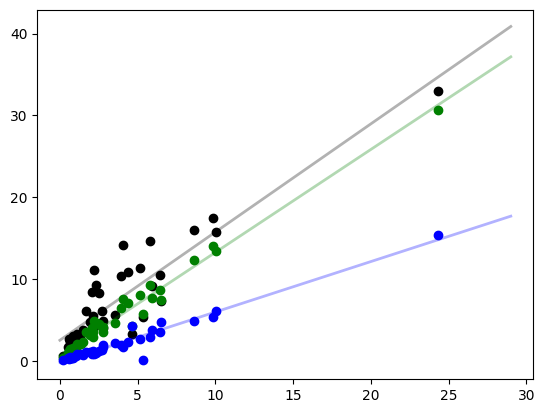

In [6]:
x = df_merge['t_drift_max10']
y05 = df_merge['t_drift_max05']
y08 = df_merge['t_drift_max08']
y12 = df_merge['t_drift_max12']
#y15 = df_merge['t_drift_max']

# y = a + bx
l05 = linregress(x, y05)
l08 = linregress(x, y08)
l12 = linregress(x, y12)
#l15 = linregress(x, y15)
xline = np.arange(0,30)

plt.plot(x, y05, 'ko')
plt.plot(xline, l05.intercept + l05.slope * xline, 'k', alpha=0.3, lw=2)
plt.plot(x, y08, 'go')
plt.plot(xline, l08.intercept + l08.slope * xline, 'g', alpha=0.3, lw=2)
plt.plot(x, y12, 'bo')
plt.plot(xline, l12.intercept + l12.slope * xline, 'b', alpha=0.3, lw=2)
#plt.plot(x, y15, 'ro')
#plt.plot(xline, l15.intercept + l15.slope * xline, 'r', alpha=0.3, lw=2)

In [7]:
#print(l05.slope, l08.slope, l12.slope, l15.slope)

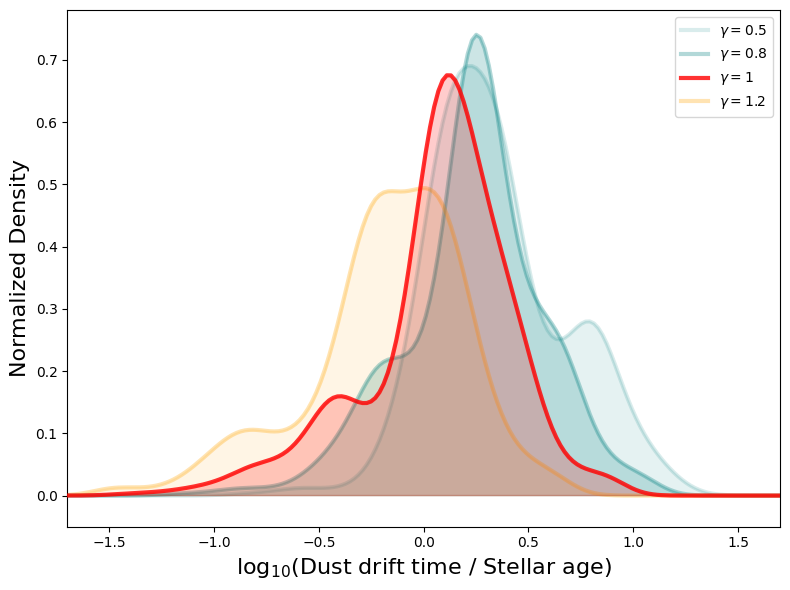

In [14]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

df10 = pd.read_csv('kernel.csv', skipinitialspace=True)
df05 = pd.read_csv('gamma0.5/kernel.csv', skipinitialspace=True)
df08 = pd.read_csv('gamma0.8/kernel.csv', skipinitialspace=True)
df12 = pd.read_csv('gamma1.2/kernel.csv', skipinitialspace=True)
#df15 = pd.read_csv('gamma1.5/kernel.csv', skipinitialspace=True)

gcol = 'teal'
ax.plot(df05['tratio'], 10**df05['logdens'], color=gcol, lw=3, alpha=0.15, label=r'$\gamma=0.5$')
ax.fill(df05['tratio'], 10**df05['logdens'], color=gcol, alpha=0.1)
ax.plot(df08['tratio'], 10**df08['logdens'], color=gcol, lw=3, alpha=0.3, label=r'$\gamma=0.8$')
ax.fill(df08['tratio'], 10**df08['logdens'], color=gcol, alpha=0.2)
ax.plot(df10['tratio'], 10**df10['logdens'], color='red', lw=3, alpha=0.8, label=r'$\gamma=1$', zorder=99)
ax.fill(df10['tratio'], 10**df10['logdens'], color='red', alpha=0.2, zorder=99)
ax.plot(df12['tratio'], 10**df12['logdens'], color='orange', lw=3, alpha=0.3, label=r'$\gamma=1.2$')
ax.fill(df12['tratio'], 10**df12['logdens'], color='orange', alpha=0.1)
#ax.plot(df15['tratio'], 10**df15['logdens'], color='red', lw=3, alpha=0.1, label=r'$\gamma=1.5$')
#ax.fill(df15['tratio'], 10**df15['logdens'], color='red', alpha=0.05)

ax.set_xlim(-1.7, 1.7)
ax.set_ylim(-0.05, 0.78)
ax.set_xlabel(r'log$_{10}$(Dust drift time / Stellar age)', fontsize=16)
ax.set_ylabel('Normalized Density', fontsize=16)
ax.legend()
fig.tight_layout()
plt.savefig('gamma.pdf', dpi=150)